## Predicting National Life Expectancy
### Identifying Socioeconomic and Health-System Drivers of Longevity Using WHO Global Health Observatory Data
Bikalpa Panthi
GitHub Repository: https://github.com/3028Bikalpa/STATS201_project_Bikki

## 1. Research Question and Motivation
### Which socioeconomic and health-system indicators most strongly predict national life expectancy, and how do different modeling strategies affect predictive performance?
Compared to other measures of health, life expectancy at birth is one of the most commonly used summary statistics for population health. Life expectancy is an index of the overall health of a population and reflects the combined effects of many variables, including: 

(1) the effectiveness of a country’s healthcare system

(2) a country’s level of economic growth

(3) the level of nutrition available to a population

(4) the level of immunisation coverage of a population 

(5) exposure to health-related risk factors. 

There is ongoing research (i.e., empirical study) to understand the relative importance of each of the above variables and whether there is a linear relationship, an interaction effect, or whether only a small number of variables have a dominating effect on the relationship between life expectancy and the variables above. 

Understanding which indicators are the best predictors of life expectancy is important from a policy perspective because there is a difference of over 30 years between the country with the longest life expectancy and the country with the shortest life expectancy. Policymakers can make more informed budgetary allocations for healthcare systems, immunisation programs and economic development by utilising regression models that correctly identify variables that are most associated with the gap in life expectancy. This project will apply machine learning regression techniques to quantify the associations between the health indicators noted above, evaluate several different regression model approaches and feature representations, and test to see if the regressions develop a predictive signal when mortality outcomes are correlated to one of the other health indicators being measured.

## 2. Data

### 2.1 Data Source and Provenance
Data were extracted from the WHO Global Health Observatory (GHO) and were enhanced with World Bank GDP per capita data. Separate datasets were downloaded as separate Excel/CSV exports for each indicator, combined into a single panel data file indexed by country-year combination (192 countries; 22 years 2000-2021) and processed using a systematic processing pipeline to standardize.

### 2.2 Unit of Analysis and Key Variables
The analysis unit is one country-year observation per unit arbitrarily defined as life expectancy at birth (both sexes). There are 12 predictor variables divided into five main categories: mortality-related indicators (15-60 year-old male and female adults; under-5 year-old males and females; , infants); vaccination coverage (percentage of people in each country who received vaccines against Hepatitis B3 and Polio3 and DTP3 last 12 month/10); gross domestic product(GDP) per capita at 2015 USD; current health expenditures (percentage of GDP); country profile (percentage of adults above a certain weight; percentage of adults below a certain weight; percentage of children/adolescents below certain weight); use of alcohol (>15 y/o).

### 2.3 Data Cleaning Pipeline
There are many steps in the cleaning pipeline. One step is filtering for feature-level completeness, where any feature that contains greater than 40 percent missing data would be dropped. The second step is filtering for the completeness of individual countries, and only retaining those countries that have a minimum of 60 percent completeness on the overall rating across features that were retained. After that, temporal interpolation with both forward and backward filling at the edges for within-country data, median imputation for across-country median to fill missing values, and mild trimming of outliers (1st and 99th percentiles) occur. Lastly, any skewed variable is logged transformed (GDP per capita, infant mortality) as well.

The resulting panel is split temporally into a training set, which consists of years 2000 - 2017, and a test set which consists of years 2018 - 2021.

### 2.4 Ethical Considerations
All the data used in this analysis is available publicly from the World Health Organization and the World Bank as aggregate statistics at the national level. There is no individual or identifiable information in this dataset; rather, the data is aggregated at the national level, which could hide large variances in the data; for example urban versus rural or gender or ethnic group variance, and also varying levels of direct causal connection.
This analysis also is purely predictive (not share-based), and the feature importances are based on statistical correlations with this dataset and do not imply any direct causal relationship that would justify an action by a policymaker.

## 3. Problem Setup

**ML Task:** Regression (predicting a continuous outcome).

**Target Variable:** Life expectancy at birth (years), both sexes, as reported by WHO.

**Input Features:** 12 socioeconomic and health-system indicators (baseline), plus log-transformed and degree-2 polynomial variants.

**Train/Test Split:** Temporal holdout — train on 2000–2017, test on 2018–2021. This prevents temporal leakage and simulates realistic forecasting conditions.

**Assumptions:** Country-year observations are treated as independent rows for modeling purposes. Temporal autocorrelation within countries is not explicitly modeled, though the temporal holdout mitigates overfitting to temporal trends. Missing data imputation assumes missingness is approximately at random within countries.

## 4. Methods

### 4.1 Feature Engineering
All of the models will be evaluated on three different representations of the data, which include: The first representation is using the 12 original predictors, as is the baseline representation. The second representation makes use of the natural logarithm (log(1+x)) for GDP per capita and infant deaths to decrease right skew and dominance of scale.The third representation is polynomial, and it creates two interactions (degree 2) and squared/polynomial terms from the original predictors using the PolynomialFeatures library from scikit-learn. All models use standardized features before fitting any linear model.

### 4.2 Models
Seven models will be evaluated with different levels of complexity. The simplest model (shown here) is a Dummy Regressor (predict mean from the training dataset); the second simplest is Linear Regression – this serves as the baseline for standard (parametric) linear regression. Ridge Regression (alpha = 0.01) adds L2 regularization to the linear regression, while Lasso Regression (alpha = 0.001) adds L1 regularization. The fourth model (Decision Trees – maximum depth of 10) detects non-linear splits. The Random Forest model (300 trees with a maximum depth of 15) reduces variance by combining multiple trees. The final model is Gradient Boosting (200 trees with a maximum depth of 3), which builds sequentially corrects for residuals. All 7 models will be trained on all three representations of features giving 7x3 total comparisons.

## 5. Evaluation

### 5.1 Metrics
The primary evaluation metrics are Test R² (proportion of variance explained on the held-out 2018–2021 period) and Test RMSE (root mean squared error in years of life expectancy). The R² Gap (Train R² minus Test R²) is also reported as an overfitting diagnostic. 

### 5.2 Baseline Results
![Weixin Image_2026-02-28_192932_009.png](<attachment:Weixin Image_2026-02-28_192932_009.png>)

### 5.3 Advanced Model Results
![Weixin Image_2026-02-28_232738_026.png](<attachment:Weixin Image_2026-02-28_232738_026.png>)

The best-performing combination is Random Forest with log-enhanced features, achieving a Test R² of 0.988 and an RMSE of 0.754 years. This means the model explains 98.8% of the variance in national life expectancy on unseen future data and is, on average, within 0.75 years of the true value. The predicted-versus-actual scatter plot shows tight clustering along the diagonal across the full range of life expectancies (approximately 50–85 years).
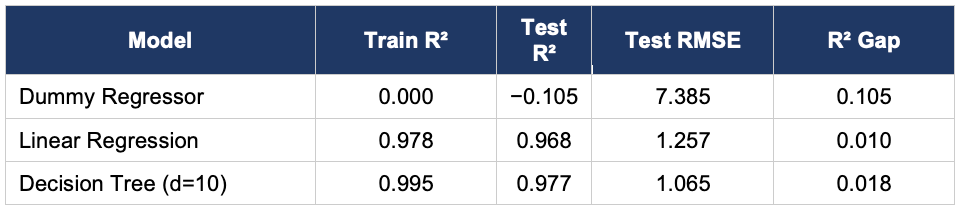
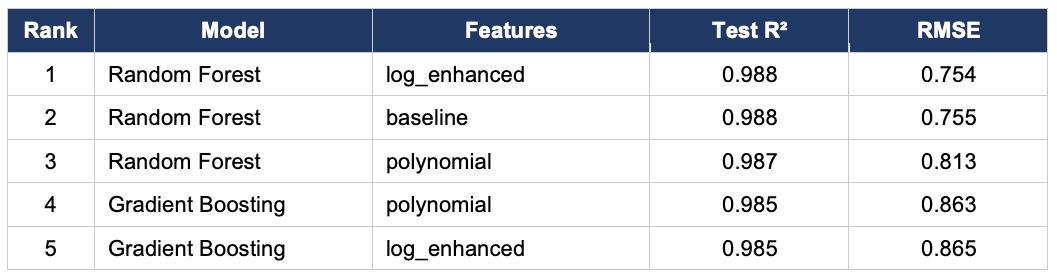

## 6. Error Analysis and Diagnostics

### 6.1 Feature Importance: The Mortality Dominance Problem
The analysis of the best-performing Random Forest model shows that adult_mortality_15_60 is overwhelmingly dominant as a predictive signal, while under-5 mortality is a distant second place. The remaining variables contribute to a very minimal extent; this creates a significant issue in that mortality measures are very nearly-tautological with respect to life expectancies (each is based on death rates). This implies that the model is much more likely to be engaged in a sophisticated identity mapping process than it is to be finding real-world socioeconomic factors that could serve as valid predictors.
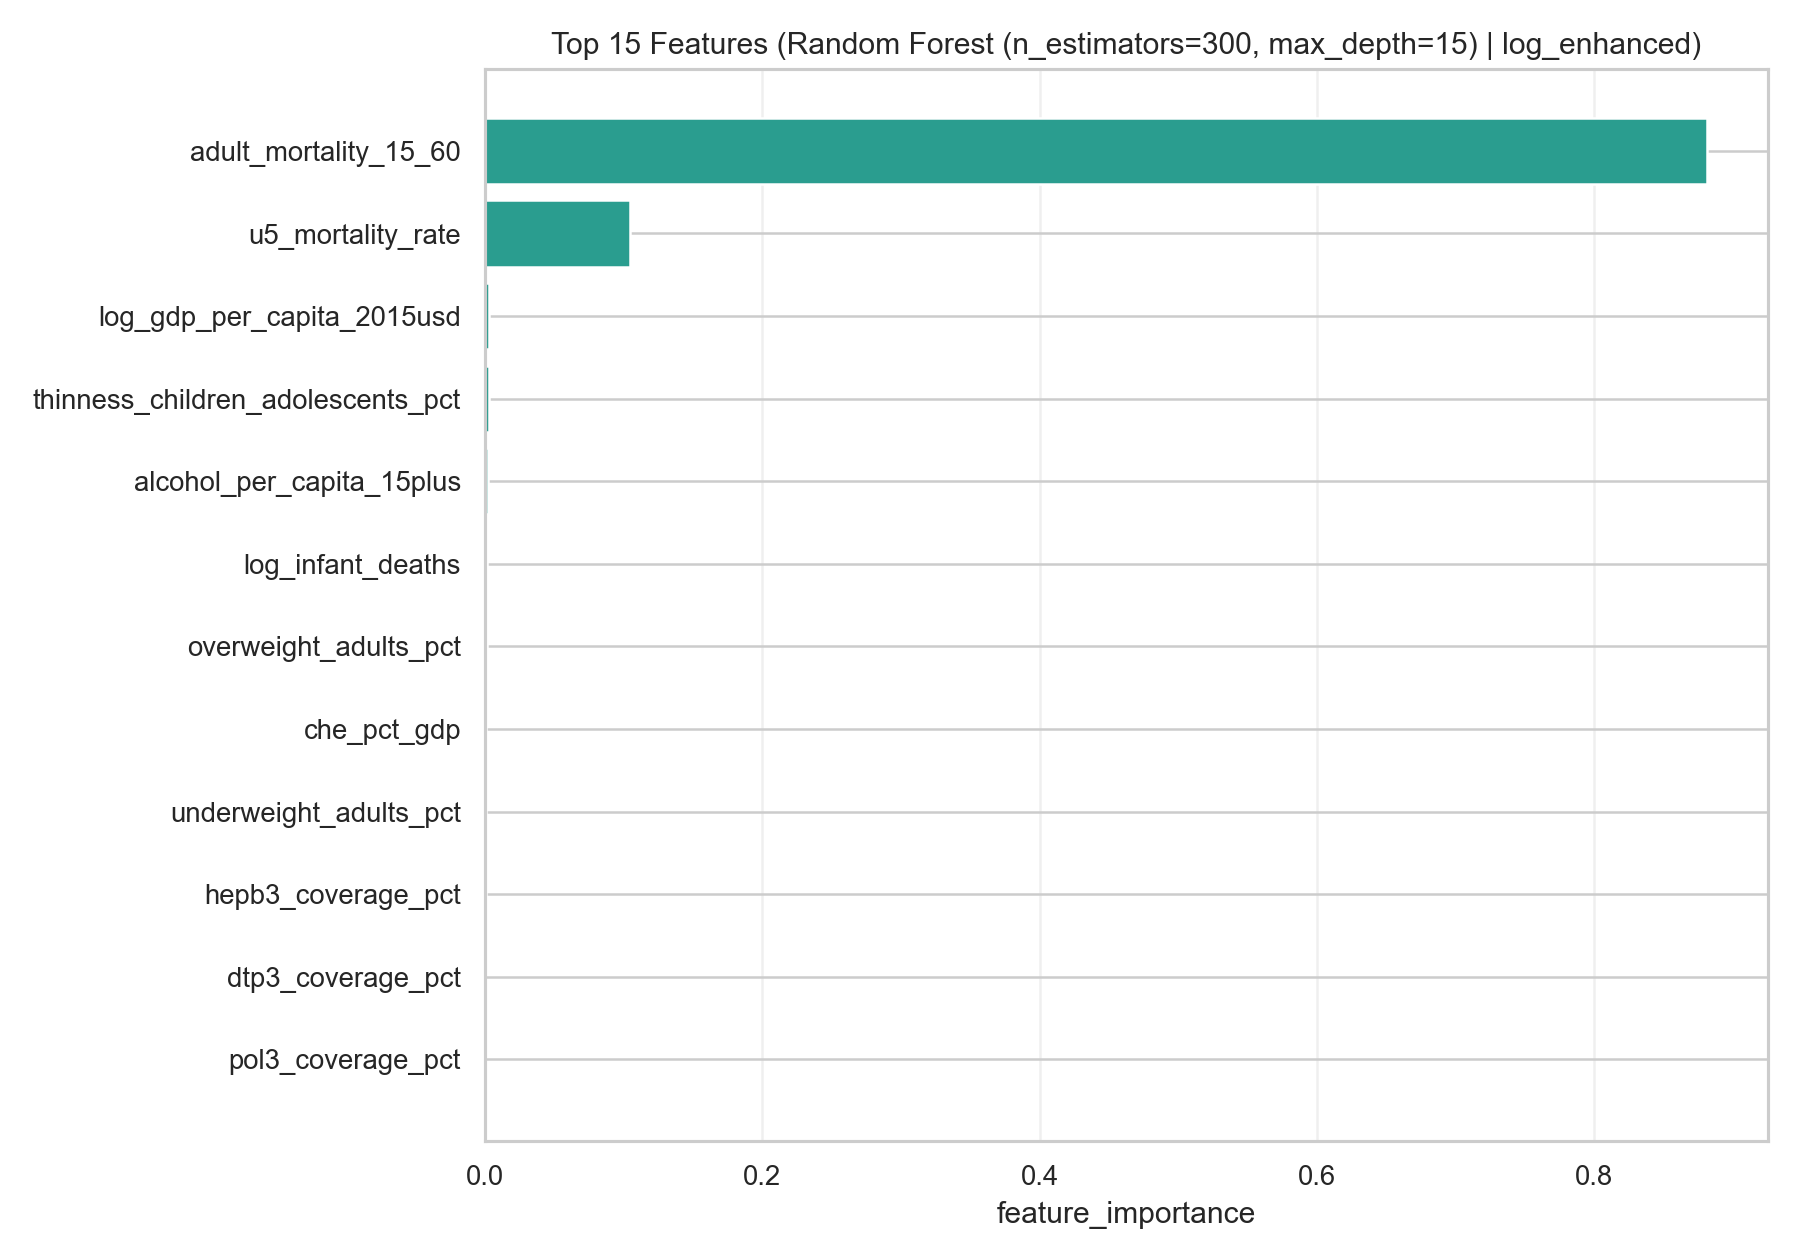

### 6.2 Non-Mortality Analysis
To address this, a parallel analysis removes all three mortality variables (adult mortality, under-5 mortality, infant deaths) and re-evaluates all models. The results are reported below.
![Weixin Image_2026-02-28_234659_812.png](<attachment:Weixin Image_2026-02-28_234659_812.png>)
Without mortality variables, the best model (Random Forest with polynomial features) still achieves R² = 0.875, though RMSE increases from 0.754 to 2.483 years. This confirms that meaningful predictive signal exists in non-tautological socioeconomic and health-system variables. After removing mortality, the top predictors shift to the interaction of health expenditure (% of GDP) with GDP per capita, the interaction of polio vaccination coverage with GDP per capita, and various combinations involving underweight prevalence, child thinness, and alcohol consumption.
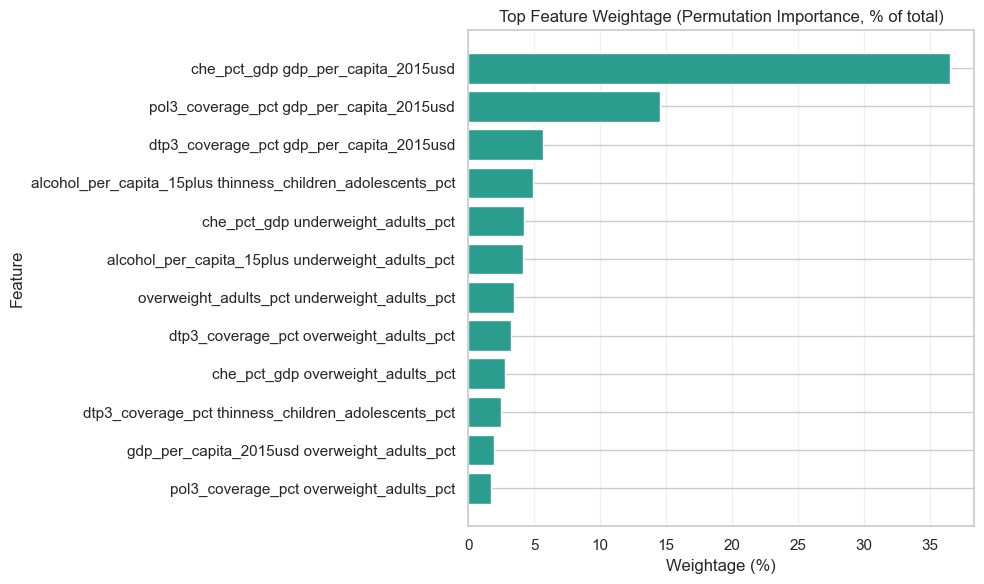

### 6.3 Disease and Conflict Shock Analysis
This supplementary analysis looks at the question of whether the inclusion of specific proxies for conflict and pandemic shocks enhances prediction. Four new variables are created: a conflict shock proxy (based on sudden increases in the rate of being underweight and GDP), a 5-year post-conflict proxy, a dummy for the COVID era (2020-2021), and a pandemic stress proxy. The results show that the inclusion of these shock variables provides little additional predictive power with the current model structure, but the results of a stress test with a more severe pandemic scenario show substantially different predictions for life expectancy than the standard model, suggesting that the model is sensitive to disruptions.

### 6.4 Robustness Checks
Temporal Sensitivity Testing varied the year of dividing training and testing data using a training to test split. These tests found that model performance remained stable across multiple train / test divider points. Sample size sensitivity testing demonstrated that the model maintained strong model performance with less than optimal amounts of training data. Since the R² gap between the T and E is less than or equal to 0.018 for the best models, there was a small amount of overfitting to the calculator training data set.
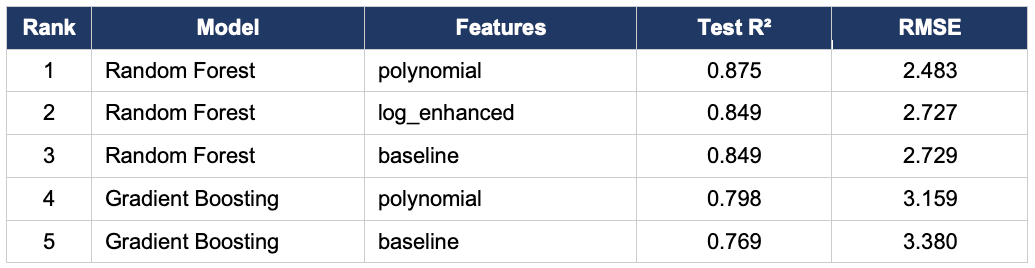

## 7. Interpretation and Substantive Takeaways
The analysis produces several statistically significant results, with mortality measures being the dominant predictor of life expectancy (a finding that is expected due to their definition relative to life expectancy), thus confirming that the statistic of life expectancy is essentially derived from mortality statistics. Additionally, when mortality is excluded from consideration, GDP per capita and health spending become the best joint predictor of life expectancy—the implication is that GDP alone does not determine health; it is more so how much of the GDP is allocated to healthcare that has the greatest impact on life expectancy. Immunization coverage (i.e. polio and DTP) also had a strong relationship with economic variables—which indicates to us that immunization programs may have a more significant effect in lower-income countries compared to higher-income countries. Lastly, underweight adults and wasting in children remain significant predictors of life expectancy, therefore malnutrition continues to play a significant role in determining life expectancy outcomes.

Given that socioeconomic and medical system variables are able to predict life expectancy of countries, regardless of whether mortality data are used (R² = 0.875), it would appear that the feature importance of the model should not be taken to suggest an impact attributable to policy intervention. Rather, what has been provided is evidence of the relationships between variables, but not the causal effects of implementing any type of public health policy. Also, the averages presented regretfully do not depict the diversity within the same country.

## 8. Limitations and Future Work

### 8.1 Limitations
There are some limitations that should be considered. This analysis is correlational rather than causal; therefore, although we can see feature importance based on statistical correlation in this dataset, there is no guarantee that we will find causal pathways associated with policy action (or an agent's action). Average values at the country-year level may not represent the realities at the subnational level. The model has a relatively small number of predictor variables (12); thus, it is unable to account for the full complexity of the determinants of life expectancy. There are many examples of collinearity among the health system indicators; for example, there is significant collinearity among the three immunization variables, causing lessening of the apparent unique contribution of each variable. Major structural breaks (e.g., COVID-19) result in a change in the relationships among variables in ways not predicted by the historic data.

### 8.2 Future Work
Future developing projections for life expectancy for 2030 based on existing trends through different scenarios (baseline/optimistic/pessimistic), validating proxy indicators of disease and conflicts related to "structural shocks'', including sources of data at sub-national levels, and considering methods of causal identification (e.g., instrumental variables, difference in differences) will provide researchers with the means to go beyond purely associate-based conclusions.

## 9. References
World Health Organization. Global Health Observatory Data Repository. https://www.who.int/data/gho

### AI Acknowledgment
AI was used in writing some of the codes along with helping to rephrase the language in the report. The major contribution of GenAI tool was in code enhancement, language rephrasing for reports (improving sentence structure and grammar), image decoration (enhancing the designs of the images that resulted as an output of the codes) and writing of code outside the scope of STATS 201 class at DKU.